## EDA

In [106]:
import pandas as pd

In [107]:
df = pd.read_csv("./Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [108]:
# CustomerID는 index와 같의 의미이므로 삭제한다
df.drop("CustomerID",axis=1,inplace=True)

In [109]:
df['Gender'] = df['Gender'].map({'Male':0,"Female":1})

In [110]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [111]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


### 결측치 있는지 확인

In [112]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

-> 없는듯 하다

### 너무 이상한 이상치 있는지 확인

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


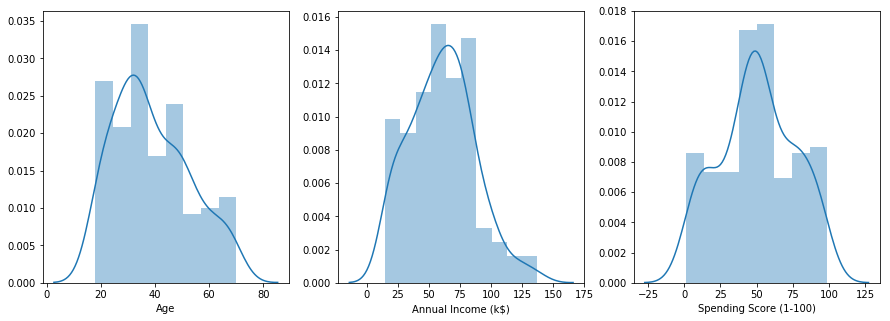

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

f,ax=plt.subplots(1,3,figsize=(15,5)) # (1,2) subplot 생성 


sns.distplot(df['Age'],ax=ax[0])
sns.distplot(df['Annual Income (k$)'],ax=ax[1])
sns.distplot(df['Spending Score (1-100)'],ax=ax[2])


-> 없는 듯 하다

## Clustering

### 2. K-Means

In [114]:
n_clusters =4

In [115]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [116]:
from sklearn.cluster import KMeans
#K-Means 군집 분석 
model = KMeans(n_clusters=n_clusters,algorithm='auto')
model.fit(df)
# 군집 번호 매겨서 분류하기
predict = pd.DataFrame(model.predict(df))
predict.columns=['predict']

In [117]:
# 한 row가 한 center다.
model.cluster_centers_

array([[ 0.62105263, 44.89473684, 48.70526316, 42.63157895],
       [ 0.53846154, 32.69230769, 86.53846154, 82.12820513],
       [ 0.47368421, 40.39473684, 87.        , 18.63157895],
       [ 0.5       , 24.82142857, 28.71428571, 74.25      ]])

In [118]:
# 그 중에서 한 차원을 빼버리면 3차원에서 z축을 빼면 flat 해지는 원리처럼 flatten 된다.
centers = model.cluster_centers_[:,1:]
centers = pd.DataFrame(centers)

In [119]:
centers

,0,1,2
0,44.894737,48.705263,42.631579
1,32.692308,86.538462,82.128205
2,40.394737,87.000000,18.631579
3,24.821429,28.714286,74.250000


In [120]:
centers.loc[0]

0    44.894737
1    48.705263
2    42.631579
Name: 0, dtype: float64

In [121]:
centers[0]

0    44.894737
1    32.692308
2    40.394737
3    24.821429
Name: 0, dtype: float64

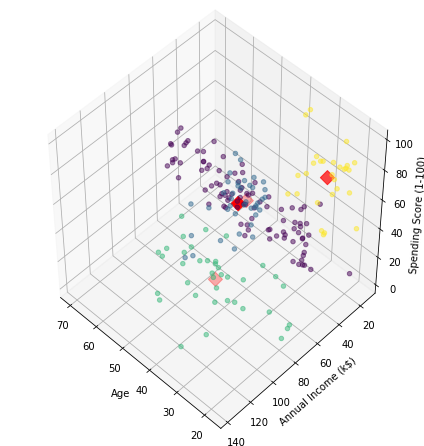

In [122]:
# 각 군집의 중심점 
# centers = pd.DataFrame(model.cluster_centers_,columns=['Gender','Age','Annual Income (k$)','Spending Score (1-100)'])
# center_x = centers['Age']
# center_y = centers['Annual Income (k$)']
# center_z = centers['Spending Score (1-100)']

# 시각화a
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(df['Age'],df['Annual Income (k$)'],df['Spending Score (1-100)'],c=predict['predict'],alpha=0.5)
# column 을 보내줘야 row별로 잘 시각화 한다.
ax.scatter(centers[0],centers[1],centers[2],s=100,marker='D',c='r')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [123]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

In [124]:
predict.loc[0].item()

3

In [125]:
df_with_predict = pd.concat([df,predict],axis=1)

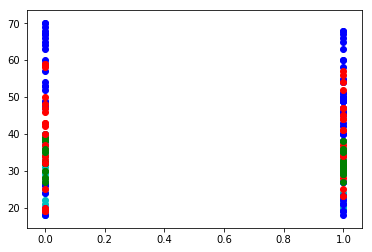

In [126]:
for i in range(len(df)):
    for j in range(n_clusters):
        if predict.loc[i].item() == j:
            plt.scatter(df.loc[i,'Gender'],df.loc[i,'Age'],c=colors[j])

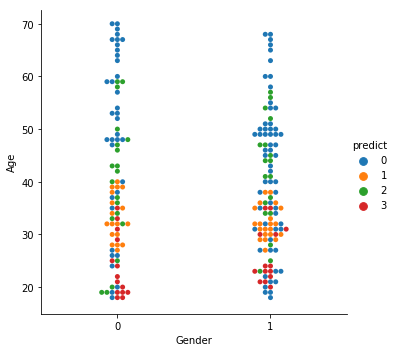

In [127]:
sns.catplot(x="Gender", y="Age",hue = "predict", kind="swarm", data=df_with_predict)

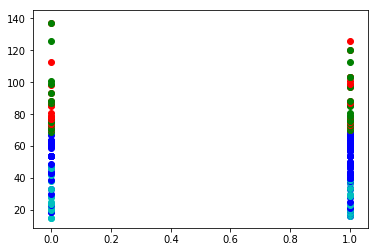

In [128]:
for i in range(len(df)):
    for j in range(n_clusters):
        if predict.loc[i].item() == j:
            plt.scatter(df.loc[i,'Gender'],df.loc[i,'Annual Income (k$)'],c=colors[j])

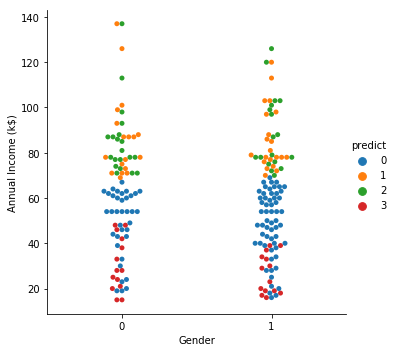

In [129]:
sns.catplot(x="Gender", y="Annual Income (k$)",hue = "predict", kind="swarm", data=df_with_predict)

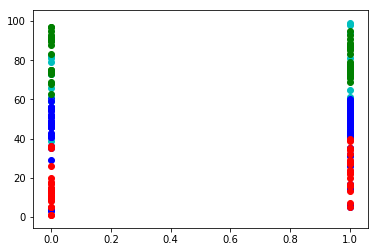

In [130]:
for i in range(len(df)):
    for j in range(n_clusters):
        if predict.loc[i].item() == j:
            plt.scatter(df.loc[i,'Gender'],df.loc[i,'Spending Score (1-100)'],c=colors[j])

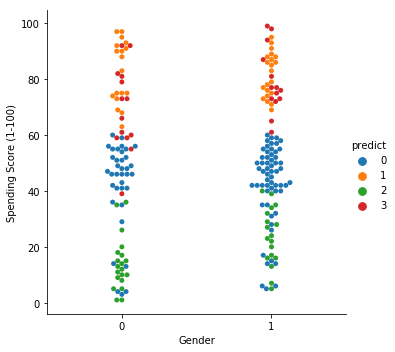

In [131]:
sns.catplot(x="Gender", y="Spending Score (1-100)",hue = "predict", kind="swarm", data=df_with_predict)

### -> Gender의 경우에 Age는 불규칙한 군집이 생긴다

### 최적의 k 설정

Text(0.5, 1.0, 'Elbow curve')

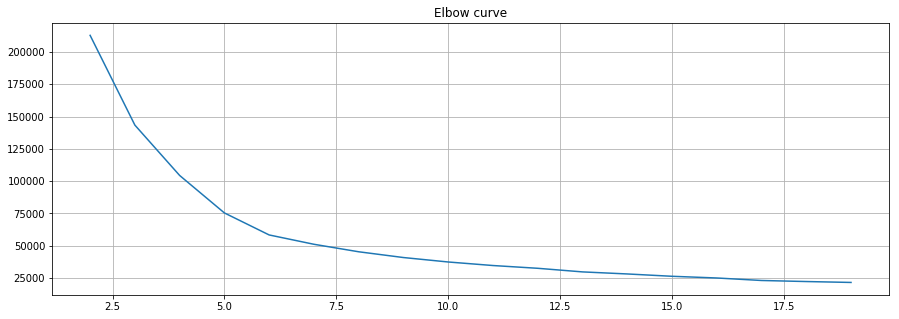

In [132]:
X = df
distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    # inertia = Sum of squared distances of samples to their closest cluster center.
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

-> 6개 정도로 잡는게 좋을 듯하다

### 3. DBSCAN gender 빼고 해보기

gender 자료가 시각화 해보니 clustering하는데 좋은 feature가 아니다.

In [133]:
df.drop('Gender',axis=1,inplace=True)

### 그냥 막 찍어서 넣어보기

In [134]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.3,min_samples=6)

predict = pd.DataFrame(model.fit_predict(df))
predict.columns=['predict']

# predict 한것 붙이기
df_with_predict = pd.concat([df,predict],axis=1)

df_with_predict.head()

,Age,Annual Income (k$),Spending Score (1-100),predict
0,19,15,39,-1
1,21,15,81,-1
2,20,16,6,-1
3,23,16,77,-1
4,31,17,40,-1


In [135]:
predict[predict['predict']!=-1]

,predict


### -> 분류가 안된다. 다 노이즈로 읽힌다. 조정해봐야 한다. k-dist 사용해보기

In [137]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import pairwise_distances
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html
distance = euclidean_distances(df, df)
# distance = pairwise_distances(df,df)

#### 질문. 거리계산은 이렇게 하면 맞나요?? ㅜㅜ 수치가 조금 이상하게 나와서 ㅜㅜ

In [138]:
distance

array([[  0.        ,  42.04759208,  33.03028913, ..., 117.1110584 ,
        124.47489707, 130.15759678],
       [ 42.04759208,   0.        ,  75.01333215, ..., 111.7631424 ,
        137.74614332, 122.34786471],
       [ 33.03028913,  75.01333215,   0.        , ..., 129.87686476,
        122.18428704, 143.77065069],
       ...,
       [117.1110584 , 111.7631424 , 129.87686476, ...,   0.        ,
         57.07013229,  14.35270009],
       [124.47489707, 137.74614332, 122.18428704, ...,  57.07013229,
          0.        ,  65.03076195],
       [130.15759678, 122.34786471, 143.77065069, ...,  14.35270009,
         65.03076195,   0.        ]])

In [139]:
distance.shape

(200, 200)

In [140]:
# 각 점에서 뻗어가는 거리 나옴
distance[0][:10]

array([ 0.        , 42.04759208, 33.03028913, 38.22302971, 12.20655562,
       37.17526059, 36.79673899, 55.22680509, 57.76677246, 35.0142828 ])

In [145]:
# 그중에서 네번째로 먼 애들 찾기
K=4
# https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array
k_dist = []
for n in range(len(distance)):
    sort = distance[n].argsort()
    for i in range(len(sort)):
        if sort[i] == 4: # 4번째로 가까운 애면 list에 붙여라
            k_dist.append((i,distance[n][i])) 

In [146]:
k_dist[:10]  

[(1, 42.04759208325728),
 (29, 15.362291495737216),
 (11, 94.24966843443005),
 (28, 50.73460357586329),
 (0, 12.206555615733702),
 (28, 49.92995093127971),
 (19, 92.13576938409967),
 (35, 19.949937343260004),
 (22, 19.078784028338912),
 (25, 13.490737563232042)]

In [147]:
# sorting하기
sorted_dist = list(map(lambda x:x[1],sorted(k_dist,key=lambda x: x[1])))

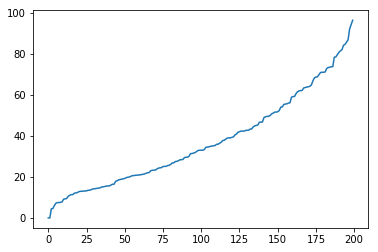

In [148]:
plt.plot(sorted_dist)

## Q.원래 이렇게 값 바뀌는 지점 없이 linear하게 증가하기도 하나요? 잘못 계산한걸까요?? ㅜㅜ-> 다들 거리가 비슷한건가

## k-dist가 잘 안되므로 grid search 해보기

In [158]:
# search 해보기
for eps in range(40):
    for s in range(3,31):
        model = DBSCAN(eps=eps*0.5+0.5,min_samples=s)

        predict = pd.DataFrame(model.fit_predict(df))
        predict.columns=['predict']

        # predict 한것 붙이기
        df_with_predict = pd.concat([df,predict],axis=1)
        
        if (predict['predict']==-1).sum()<20 and len(predict['predict'].unique())>2:
            print('예측거리=',eps*0.5+0.5, '예측min개수=',s, '결측치로 처리될 값=',(predict['predict']==-1).sum(),'unique한 class 개수 =', predict['predict'].unique())
            
        
        

예측거리= 12.0 예측min개수= 3 결측치로 처리될 값= 18 unique한 class 개수 = [-1  0  1  2  4  3  5]
예측거리= 12.5 예측min개수= 3 결측치로 처리될 값= 16 unique한 class 개수 = [ 0 -1  1  2]
예측거리= 12.5 예측min개수= 4 결측치로 처리될 값= 18 unique한 class 개수 = [ 0 -1  1  2  3  4]
예측거리= 13.0 예측min개수= 3 결측치로 처리될 값= 16 unique한 class 개수 = [ 0 -1  1  2]
예측거리= 13.0 예측min개수= 4 결측치로 처리될 값= 17 unique한 class 개수 = [ 0 -1  1  2  3]
예측거리= 13.5 예측min개수= 3 결측치로 처리될 값= 8 unique한 class 개수 = [ 0 -1  1]
예측거리= 13.5 예측min개수= 4 결측치로 처리될 값= 10 unique한 class 개수 = [ 0 -1  1  2]
예측거리= 13.5 예측min개수= 5 결측치로 처리될 값= 17 unique한 class 개수 = [-1  0  1  2]
예측거리= 14.0 예측min개수= 3 결측치로 처리될 값= 8 unique한 class 개수 = [ 0 -1  1]
예측거리= 14.0 예측min개수= 4 결측치로 처리될 값= 9 unique한 class 개수 = [ 0 -1  1]
예측거리= 14.0 예측min개수= 5 결측치로 처리될 값= 14 unique한 class 개수 = [-1  0  1]
예측거리= 14.5 예측min개수= 3 결측치로 처리될 값= 5 unique한 class 개수 = [ 0 -1  1]
예측거리= 14.5 예측min개수= 4 결측치로 처리될 값= 9 unique한 class 개수 = [ 0 -1  1]
예측거리= 14.5 예측min개수= 5 결측치로 처리될 값= 14 unique한 class 개수 = [-1  0  1]
예측거리= 14.5 예측min개수= 6 결측치로 처

-> 예측거리= 13.5 예측min개수= 4 결측치로 처리될 값= 10 unique한 class 개수 = [ 0 -1  1  2]
13.5, 4 정도가 괜찮을 듯

In [159]:
# 흐어어ㅜㅜ 다 결측치가 너무 많이 나오거나 모두 같은 cluster로 나온다
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=13.5,min_samples=4)

predict = pd.DataFrame(model.fit_predict(df))
predict.columns=['predict']

# predict 한것 붙이기
df_with_predict = pd.concat([df,predict],axis=1)

df_with_predict.head()

,Age,Annual Income (k$),Spending Score (1-100),predict
0,19,15,39,0
1,21,15,81,0
2,20,16,6,-1
3,23,16,77,0
4,31,17,40,0


#### -> 앗! class가 많아도 0 class가 대부분을 먹어버린다.
### and (predict['predict']==0).sum()<60 조건 붙여서 적당히 나누어진 애들을 찾아본다 -> 없다 -> 110 미만으로 하니까 딱 한개 나온다. 추측해보면, k-dist 거리도 비슷한걸 보면 대부분 같이 몰려있는것으로 추측된다

In [180]:
# search 해보기
for eps in range(40):
    for s in range(3,31):
        model = DBSCAN(eps=eps*0.5+0.5,min_samples=s)

        predict = pd.DataFrame(model.fit_predict(df))
        predict.columns=['predict']

        # predict 한것 붙이기
        df_with_predict = pd.concat([df,predict],axis=1)
        # 0개수가 60개 이하인것 찾기
        if (predict['predict']==-1).sum()<20 and len(predict['predict'].unique())>2 and (predict['predict']==0).sum()<110:
            print('예측거리=',eps*0.5+0.5, '예측min개수=',s, '결측치로 처리될 값=',(predict['predict']==-1).sum(),'unique한 class 개수 =', predict['predict'].unique())
            
        
        

예측거리= 12.0 예측min개수= 3 결측치로 처리될 값= 18 unique한 class 개수 = [-1  0  1  2  4  3  5]


In [181]:
model = DBSCAN(eps=12,min_samples=3)

predict = pd.DataFrame(model.fit_predict(df))
predict.columns=['predict']

# predict 한것 붙이기
df_with_predict = pd.concat([df,predict],axis=1)

In [182]:
df_with_predict

,Age,Annual Income (k$),Spending Score (1-100),predict
0,19,15,39,-1
1,21,15,81,0
2,20,16,6,-1
3,23,16,77,0
4,31,17,40,1
5,22,17,76,0
6,35,18,6,-1
7,23,18,94,-1
8,64,19,3,1
9,30,19,72,0


### -> 좀 다양하게 나온다

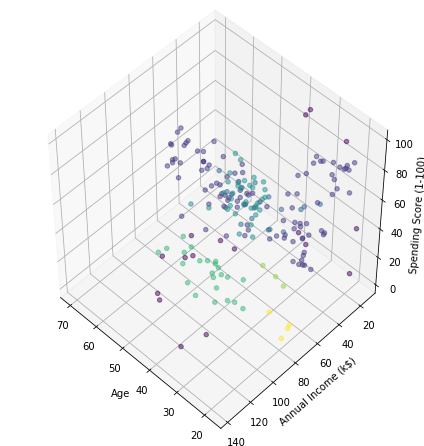

In [184]:
# 각 군집의 중심점 
# centers = pd.DataFrame(model.cluster_centers_,columns=['Gender','Age','Annual Income (k$)','Spending Score (1-100)'])
# center_x = centers['Age']
# center_y = centers['Annual Income (k$)']
# center_z = centers['Spending Score (1-100)']

# 시각화a
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(df_with_predict['Age'],df_with_predict['Annual Income (k$)'],df_with_predict['Spending Score (1-100)'],c=df_with_predict['predict'],alpha=0.5)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

## scaling도 해보자

In [154]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [167]:
scaled_df.head()

,0,1,2
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [171]:
# search 해보기
for eps in range(20):
    for s in range(3,31):
        #
        model = DBSCAN(eps=eps*0.1+0.1,min_samples=s)

        predict = pd.DataFrame(model.fit_predict(scaled_df))
        predict.columns=['predict']

        # predict 한것 붙이기
        df_with_predict = pd.concat([scaled_df,predict],axis=1)
        # 0개수가 60개 이하인것 찾기
        if (predict['predict']==-1).sum()<20 and len(predict['predict'].unique())>2 and (predict['predict']==0).sum()<140:
            print('예측거리=',eps*0.5+0.5, '예측min개수=',s, '결측치로 처리될 값=',(predict['predict']==-1).sum(),'unique한 class 개수 =', predict['predict'].unique())
            
        
        

## -> 원하는 값이 전혀 안나온다 ㅜㅜ scaling 했으니 eps도 낮을 것으로 예상해 간격을 줄였는데도 안나온다. 실제로 서로 같은 group일지도 모른다는 생각이 들었지만, knn에서는 잘 나누어 졌다. 이래서 다양한 모델로 돌려보나보다.
## Q. knn에서 잘 되었는데 dbscan에서는 잘 안되는 이유는 뭘까요?? ㅜㅜ 다들 거리가 비슷비슷해서 knn에서는 cluster 개수를 명확히 정해줬으니까 나눈거지만, dbscan에서는 다 비슷한 거라고 판단한걸까요? ㅜㅜ